In [7]:
#A1

import pandas as pd
import numpy as np

# === STEP 1: Load Excel Sheet ===
file_path =r"C:\Users\year3\Desktop\cse23121_ml\Lab Session Data (1).xlsx"
df = pd.read_excel(file_path, sheet_name="Purchase data")

# === STEP 2: Segregate A and C matrices ===
A = df.iloc[:, :-1].values  # All columns except last (product quantities)
C = df.iloc[:, -1].values   # Last column (total cost)

# === STEP 3: Dimensionality and number of vectors ===
dimensionality = A.shape[1]
num_vectors = A.shape[0]

print(f"Dimensionality of vector space: {dimensionality}")
print(f"Number of vectors in the vector space: {num_vectors}")

# === STEP 4: Rank of matrix A ===
rank_A = np.linalg.matrix_rank(A)
print(f"Rank of Matrix A: {rank_A}")

# === STEP 5: Calculate cost of each product using pseudo-inverse ===
A_pinv = np.linalg.pinv(A)
X = A_pinv @ C  # Cost vector

print("\nEstimated cost of each product:")
for i, cost in enumerate(X):
    print(f"Product {i+1}: ₹{cost:.2f}")


Dimensionality of vector space: 21
Number of vectors in the vector space: 10


UFuncTypeError: Cannot cast ufunc 'svd' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [11]:
#A2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# load file
file_path =r"C:\Users\year3\Desktop\cse23121_ml\Lab Session Data (1).xlsx"
df = pd.read_excel(file_path, sheet_name="Purchase data")

#data cleaning
df_numeric = df.select_dtypes(include=['number'])   

# split data for features
X = df_numeric.iloc[:, :-1]     # All columns except the last (product quantities)
total_cost = df_numeric.iloc[:, -1]  # Last column is total cost

# creating 2 labels
labels = total_cost.apply(lambda x: 'RICH' if x > 200 else 'POOR')

# assigning value to label
le = LabelEncoder()
y = le.fit_transform(labels)

# spliting data as 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random forest classification
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# prediction
y_pred = clf.predict(X_test)

# eval report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

        POOR       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Mean of Price: 1560.663453815261
Variance of Price: 58732.365352539186
Mean of Wednesday Prices: 1550.706
Observation: Lower or Equal than population mean
Mean of April Prices: 1698.9526315789474
Observation: Higher than population mean
Probability of making a loss: 0.50
Probability of profit on Wednesday: 0.42


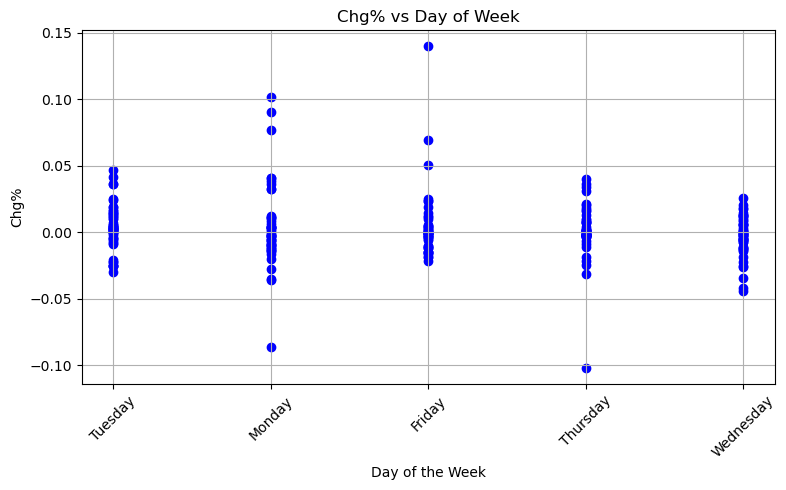

In [13]:
#A3

import pandas as pd
import statistics
import matplotlib.pyplot as plt

#load file
file_path = r"C:\Users\year3\Desktop\cse23121_ml\Lab Session Data (1).xlsx"
df = pd.read_excel(file_path, sheet_name="IRCTC Stock Price")

# mean and variance
price = df.iloc[:, 3]  # Column D (0-based index 3)
mean_price = statistics.mean(price)
variance_price = statistics.variance(price)
print(f"Mean of Price: {mean_price}")
print(f"Variance of Price: {variance_price}")

# mean of wednesday
df['Date'] = pd.to_datetime(df['Date'])  # Ensure date is in datetime format
df['DayOfWeek'] = df['Date'].dt.day_name()
wednesday_prices = df[df['DayOfWeek'] == 'Wednesday'].iloc[:, 3]  # Column D
mean_wed = statistics.mean(wednesday_prices)
print(f"Mean of Wednesday Prices: {mean_wed}")
print("Observation:", "Higher" if mean_wed > mean_price else "Lower or Equal", "than population mean")

# mean of prices in april
april_prices = df[df['Date'].dt.month == 4].iloc[:, 3]  # Column D
mean_april = statistics.mean(april_prices)

print(f"Mean of April Prices: {mean_april}")
print("Observation:", "Higher" if mean_april > mean_price else "Lower or Equal", "than population mean")

# loss probability
chg_percent = df.iloc[:, 8]  # Column I (0-based index 8)
num_loss_days = (chg_percent < 0).sum()
prob_loss = num_loss_days / len(chg_percent)
print(f"Probability of making a loss: {prob_loss:.2f}")

# profit probability
is_wed = df['DayOfWeek'] == 'Wednesday'
wed_chg = chg_percent[is_wed]
prob_profit_wed = (wed_chg > 0).sum() / len(wed_chg)
print(f"Probability of profit on Wednesday: {prob_profit_wed:.2f}")

# Conditional probability: P(profit | Wednesday)
# plotting
plt.figure(figsize=(8, 5))
plt.scatter(df['DayOfWeek'], chg_percent, color='blue')
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.title('Chg% vs Day of Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Column Data Types:
Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measu

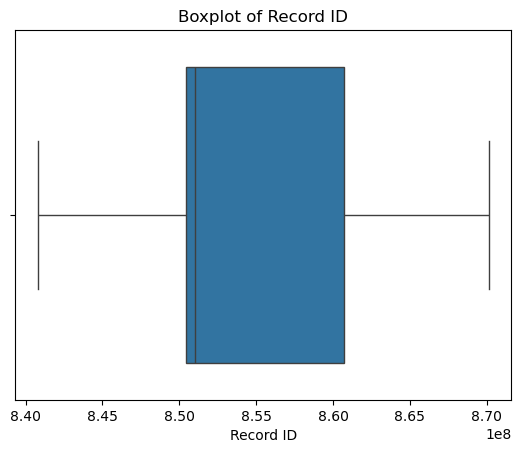

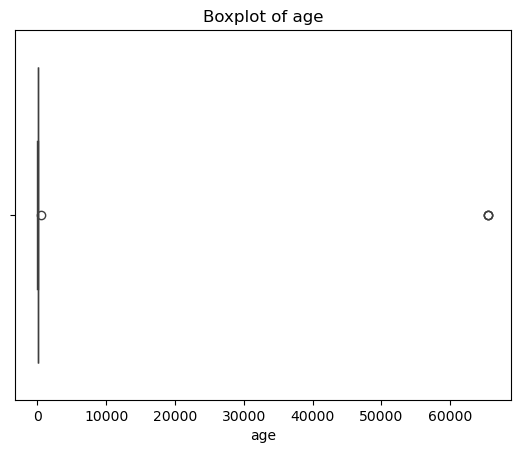


Mean and Variance of Numeric Columns:
Record ID: Mean = 852947346.61, Variance = 57486250586150.34, Std Dev = 7581968.78
age: Mean = 73.56, Variance = 1401800.87, Std Dev = 1183.98


In [15]:
#A4

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load data
file_path =  r"C:\Users\year3\Desktop\cse23121_ml\Lab Session Data (1).xlsx"
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# datatype analysis
print("Column Data Types:")
print(df.dtypes)

# encoding suggestion
print("\nUnique Values in Each Column (to decide encoding):")
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}...")  # Show first 5 unique values

print("\nSuggested Encoding:")
for col in df.columns:
    if df[col].dtype == 'object':
        unique_vals = df[col].nunique()
        if unique_vals <= 10:
            print(f"{col}: One-Hot Encoding (Nominal)")
        else:
            print(f"{col}: Label Encoding (Likely Ordinal or high-cardinality Nominal)")
    else:
        print(f"{col}: Numeric - No Encoding Needed")

# understand scale by min and max
print("\nNumeric Ranges:")
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

# check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# detect outliers
print("\nOutlier Visualization:")
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# descriptive stats
print("\nMean and Variance of Numeric Columns:")
for col in numeric_cols:
    print(f"{col}: Mean = {df[col].mean():.2f}, Variance = {df[col].var():.2f}, Std Dev = {df[col].std():.2f}")


In [16]:
#A5

import pandas as pd
import numpy as np

# Load the Excel file
file_path = r"C:\Users\year3\Desktop\cse23121_ml\Lab Session Data (1).xlsx"
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# attribute selection : binary
binary_cols = []
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    if set(unique_vals).issubset({0, 1}):
        binary_cols.append(col)

print("Binary columns used for similarity:", binary_cols)

# extract vector
v1 = df.loc[0, binary_cols].values
v2 = df.loc[1, binary_cols].values

# calculate the f value
f11 = np.sum((v1 == 1) & (v2 == 1))
f00 = np.sum((v1 == 0) & (v2 == 0))
f10 = np.sum((v1 == 1) & (v2 == 0))
f01 = np.sum((v1 == 0) & (v2 == 1))

# Calculate JC and SMC
jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
smc = (f11 + f00) / (f11 + f00 + f10 + f01) if (f11 + f00 + f10 + f01) != 0 else 0

print(f"\nf11: {f11}, f00: {f00}, f10: {f10}, f01: {f01}")
print(f"Jaccard Coefficient: {jc:.2f}")
print(f"Simple Matching Coefficient: {smc:.2f}")

#Interpretation
if jc > smc:
    print("Jaccard Coefficient is higher – more focused on presence (1s).")
else:
    print("SMC is higher – considers both presence and absence.")


Binary columns used for similarity: []

f11: 0, f00: 0, f10: 0, f01: 0
Jaccard Coefficient: 0.00
Simple Matching Coefficient: 0.00
SMC is higher – considers both presence and absence.


In [17]:
##A6

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# load file
file_path =r"C:\Users\year3\Desktop\cse23121_ml\Lab Session Data (1).xlsx"
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# encode categorical data
df_encoded = df.copy()

for col in df.columns:
    if df[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df[col].astype(str))  # Encode strings to integers

# dropping rows with missing value
df_encoded = df_encoded.dropna()

v1 = df_encoded.iloc[0].values.reshape(1, -1)
v2 = df_encoded.iloc[1].values.reshape(1, -1)

# cosine similarity
cos_sim = cosine_similarity(v1, v2)[0][0]

print(f"Cosine Similarity between observation 1 and 2: {cos_sim:.4f}")


Cosine Similarity between observation 1 and 2: 1.0000


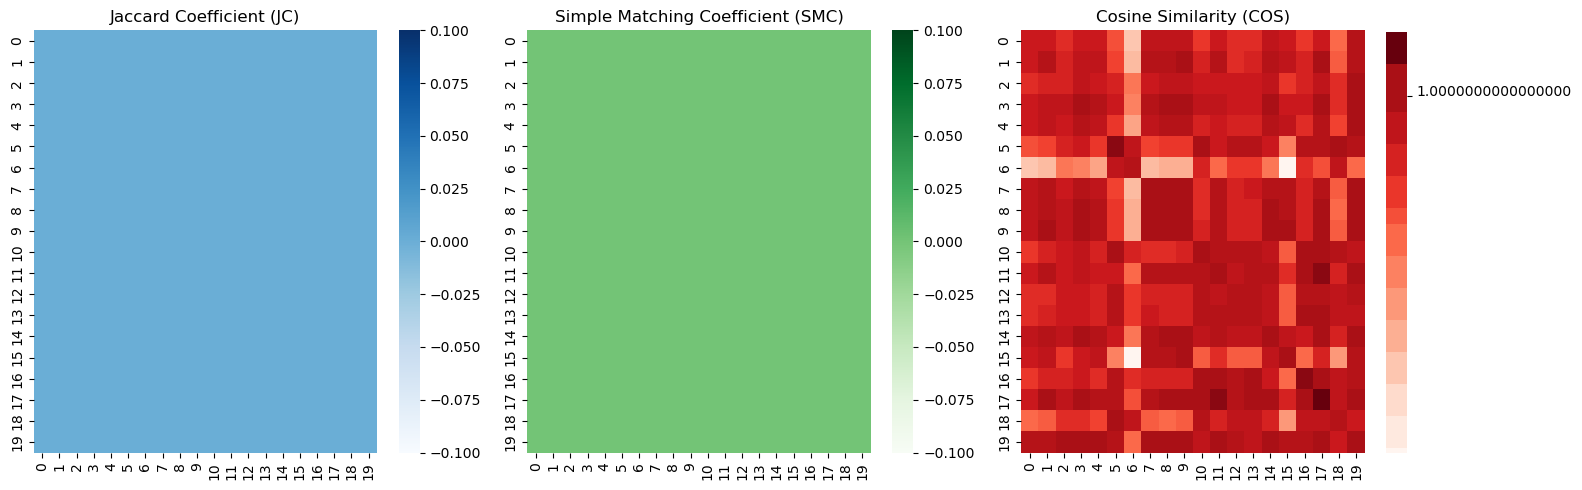

In [18]:
##A7

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# load file
file_path = "C:/Users/year3/Downloads/Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# drop columns
df = df.dropna().reset_index(drop=True)

# selecting first 20 observation
df_20 = df.iloc[:20].copy()

# binary cols
binary_cols = [col for col in df_20.columns if df_20[col].dropna().isin([0, 1]).all()]
binary_df = df_20[binary_cols]

# JC and SMC
def jaccard(v1, v2):
    f11 = np.sum((v1 == 1) & (v2 == 1))
    f10 = np.sum((v1 == 1) & (v2 == 0))
    f01 = np.sum((v1 == 0) & (v2 == 1))
    denom = f11 + f10 + f01
    return f11 / denom if denom != 0 else 0

def smc(v1, v2):
    f11 = np.sum((v1 == 1) & (v2 == 1))
    f00 = np.sum((v1 == 0) & (v2 == 0))
    f10 = np.sum((v1 == 1) & (v2 == 0))
    f01 = np.sum((v1 == 0) & (v2 == 1))
    total = f11 + f00 + f10 + f01
    return (f11 + f00) / total if total != 0 else 0

# JC and SMC matrices
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        v1 = binary_df.iloc[i].values
        v2 = binary_df.iloc[j].values
        jc_matrix[i, j] = jaccard(v1, v2)
        smc_matrix[i, j] = smc(v1, v2)

# Cosine similarity
df_encoded = df_20.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))
cos_matrix = cosine_similarity(df_encoded)

# Plotting
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=False, cmap='Blues')
plt.title("Jaccard Coefficient (JC)")

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=False, cmap='Greens')
plt.title("Simple Matching Coefficient (SMC)")

plt.subplot(1, 3, 3)
sns.heatmap(cos_matrix, annot=False, cmap='Reds')
plt.title("Cosine Similarity (COS)")

plt.tight_layout()
plt.show()
